<a href="https://colab.research.google.com/github/sweekriti321/elective_wsa_2021/blob/main/Skin_Cancer_Detection_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import os

In [27]:
!pwd

/content


In [28]:
!ls

drive  sample_data


In [29]:
os.chdir('/content/drive/MyDrive/Project/KSDS/Experimentation')

In [35]:
#!pip install opendatasets

In [36]:
!pip install opendatasets --upgrade --quiet

**Download Dataset**

In [37]:
import opendatasets as od 

In [38]:
od.download('https://www.kaggle.com/datasets/lokesh2610/ham10000')

Skipping, found downloaded files in "./ham10000" (use force=True to force download)


**Analyse Dataset**

In [39]:
import os

In [51]:
for dirpath,dirnames,filenames in os.walk('/content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000'):
  print(f"there are {len(dirnames)} directories & {len(filenames)} in {dirpath}")

there are 7 directories & 0 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000
there are 0 directories & 327 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/akiec
there are 0 directories & 514 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/bcc
there are 0 directories & 1099 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/bkl
there are 0 directories & 115 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/df
there are 0 directories & 1113 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/mel
there are 0 directories & 6705 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/nv
there are 0 directories & 142 in /content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000/vasc


In [46]:
import pathlib

In [52]:
data_dir = pathlib.Path('/content/drive/MyDrive/Project/KSDS/Experimentation/ham10000/HAM10000')

In [53]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10015


In [49]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

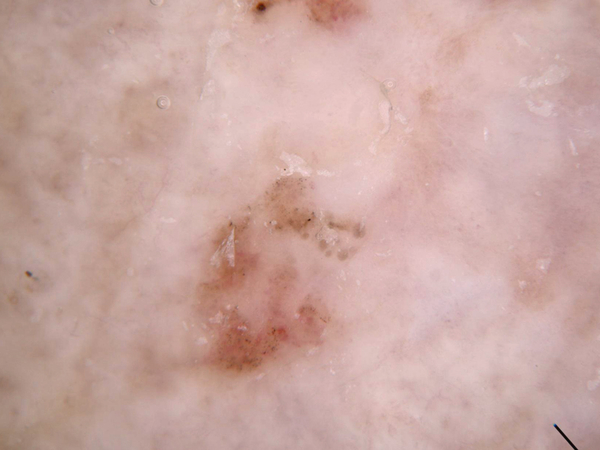

In [54]:
akiec = list(data_dir.glob('akiec/*'))
PIL.Image.open(str(akiec[0]))

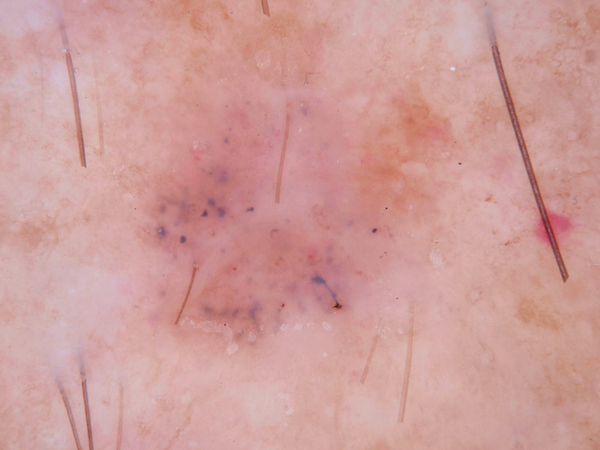

In [55]:
bcc= list(data_dir.glob('bcc/*'))
PIL.Image.open(str(bcc[0]))

In [56]:
batch_size = 32
img_height = 180
img_width = 180

**Split the datasets into Training and Validation sets**

In [57]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10015 files belonging to 7 classes.
Using 8012 files for training.


In [58]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


**Print the classes**

In [59]:
class_names = train_ds.class_names
print(class_names)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


**Visualise the Data**

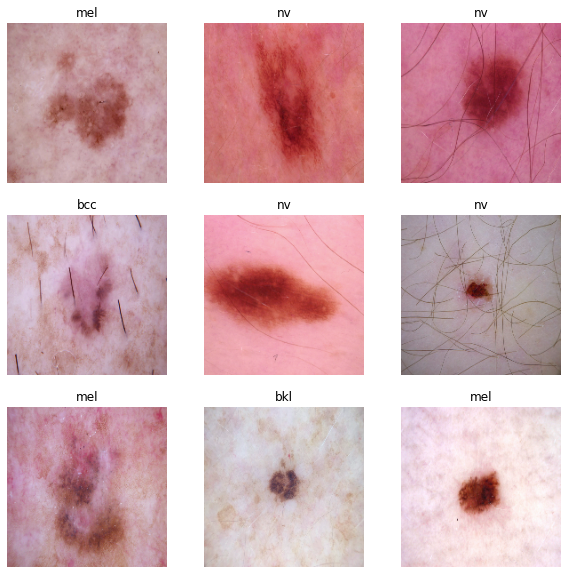

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Configure the dataset for performance**

In [61]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [62]:
len(class_names)

7

**Train Model**

In [63]:
num_classes = 7

model_1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [64]:
model_1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
 88/251 [=========>....................] - ETA: 10:06 - loss: 1.0864 - accuracy: 0.6598

**Plot Accuracy & Loss**

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_1.history['loss'], color='b', label="Training loss")
ax[0].plot(history_1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)